# Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing data

In [2]:
path1 = 'athlete_events.csv'
path2 = 'noc_regions.csv'
athlete_data = pd.read_csv(path1)
regions = pd.read_csv(path2)

# Overview of athlete events data

In [3]:
# Summary of athlete events data
print('\x1b[1;30mData Columns:\n\x1b[1;34m {}\n'.format(athlete_data.columns.tolist()))
athlete_data.head(5)

Data Columns:
 ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


We can see there are NaN values in the data lets find which all data is missing.<br>
we should be considering not null values of Age, Weight, Height and Medals while analysis to avoid issues.

In [4]:
athlete_data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# Overview on Region Codes Data

In [5]:
# Summary of NOC regions data
print('\x1b[1;30mData Columns:\n\x1b[1;34m {}\n'.format(regions.columns.tolist()))
regions.head(5)

Data Columns:
 ['NOC', 'region', 'notes']



,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# Data Preparation

In [6]:
# Data Preparation by merging the Athletes data and NOC data using pandas merge. 
data = pd.merge(athlete_data, regions, on='NOC', how='left')
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# Data Analysis based on Gender and Age

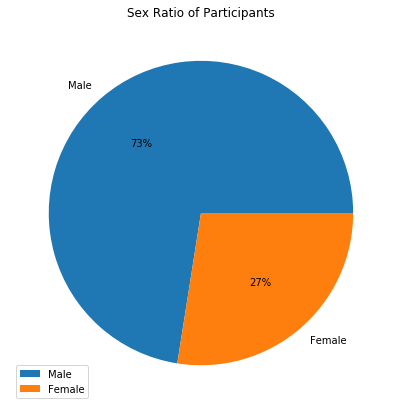

In [7]:
# Summary of Atheltes praticipated catagorized by Gender
gender_data = data['Sex'].value_counts()
labels = ['Male', 'Female']
plt.figure(figsize=(7, 7))
plt.pie(gender_data, labels=labels, autopct='%1.0f%%')
plt.title('Sex Ratio of Participants')
plt.legend(labels)
plt.show()

<Figure size 5040x3600 with 0 Axes>

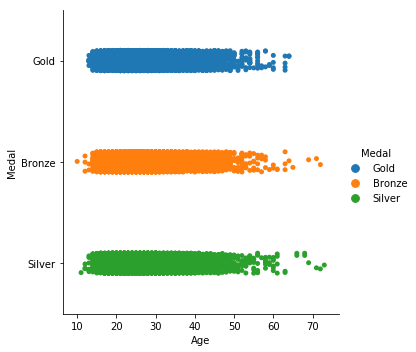

In [8]:
# Summary of Athletes winning medals catagorized by Age

medal_data = data[data.Medal.notnull()]
medals = medal_data[np.isfinite(medal_data['Age'])]
plt.figure(figsize=(70, 50))
sns.catplot(x='Age', y='Medal', data=medals, hue='Medal')
plt.show()

**It is pretty interesting that there are Athletes who are older than 60 years winning Medals.**

**Let's get deeper into Athletes with age>60**

In [9]:
# It is pretty interesting that there are Athletes who are older than 60 years winning Medals
# Let's get deeper into Athletes with age>60

sports_over_60 = medals['Sport'][medals['Age'] > 60]
print('\x1b[1;30mSports Played By Athletes with Age>60.\n\x1b[1;34m {}\n'.format(sports_over_60.unique()))

Sports Played By Athletes with Age>60.
 ['Shooting' 'Art Competitions' 'Archery' 'Roque' 'Sailing' 'Equestrianism']



In [10]:
# Let's get deeper into Athletes with age>60 by Gender
female_sports_over_60 = medals['Sport'][medals['Age'] > 60][medals['Sex'] == 'F']
print('\x1b[1;30mSports Played By Female Athletes with Age>60.\n\x1b[1;34m {}\n'.format(female_sports_over_60.unique())) 


male_sports_over_60 = medals['Sport'][medals['Age'] > 60][medals['Sex'] == 'M']
print('\x1b[1;30mSports Played By Male Athletes with Age>60.\n\x1b[1;34m {}\n'.format(male_sports_over_60.unique()))

Sports Played By Female Athletes with Age>60.
 ['Art Competitions' 'Archery']

Sports Played By Male Athletes with Age>60.
 ['Shooting' 'Art Competitions' 'Archery' 'Roque' 'Sailing' 'Equestrianism']



**It is clear that all the sports with winning atheltes older than 60 are about having keen eye sight.**

## Let's get the youngest and oldest winning Athletes

In [11]:
print('## Youngest Athlete in olympics who won medal')
print(medals.loc[medals['Age'].idxmin()])

## Youngest Athlete in olympics who won medal
ID                                        71691
Name                         Dimitrios Loundras
Sex                                           M
Age                                          10
Height                                      NaN
Weight                                      NaN
Team              Ethnikos Gymnastikos Syllogos
NOC                                         GRE
Games                               1896 Summer
Year                                       1896
Season                                   Summer
City                                     Athina
Sport                                Gymnastics
Event     Gymnastics Men's Parallel Bars, Teams
Medal                                    Bronze
region                                   Greece
notes                                       NaN
Name: 142882, dtype: object


In [12]:
print('## Oldest Athlete in olympics who won medal')
print(medals.loc[medals['Age'].idxmax()])

## Oldest Athlete in olympics who won medal
ID                                                22984
Name      John (Herbert Crawford-) Copley (Williamson-)
Sex                                                   M
Age                                                  73
Height                                              NaN
Weight                                              NaN
Team                                      Great Britain
NOC                                                 GBR
Games                                       1948 Summer
Year                                               1948
Season                                           Summer
City                                             London
Sport                                  Art Competitions
Event     Art Competitions Mixed Painting, Graphic Arts
Medal                                            Silver
region                                               UK
notes                                               NaN
Name

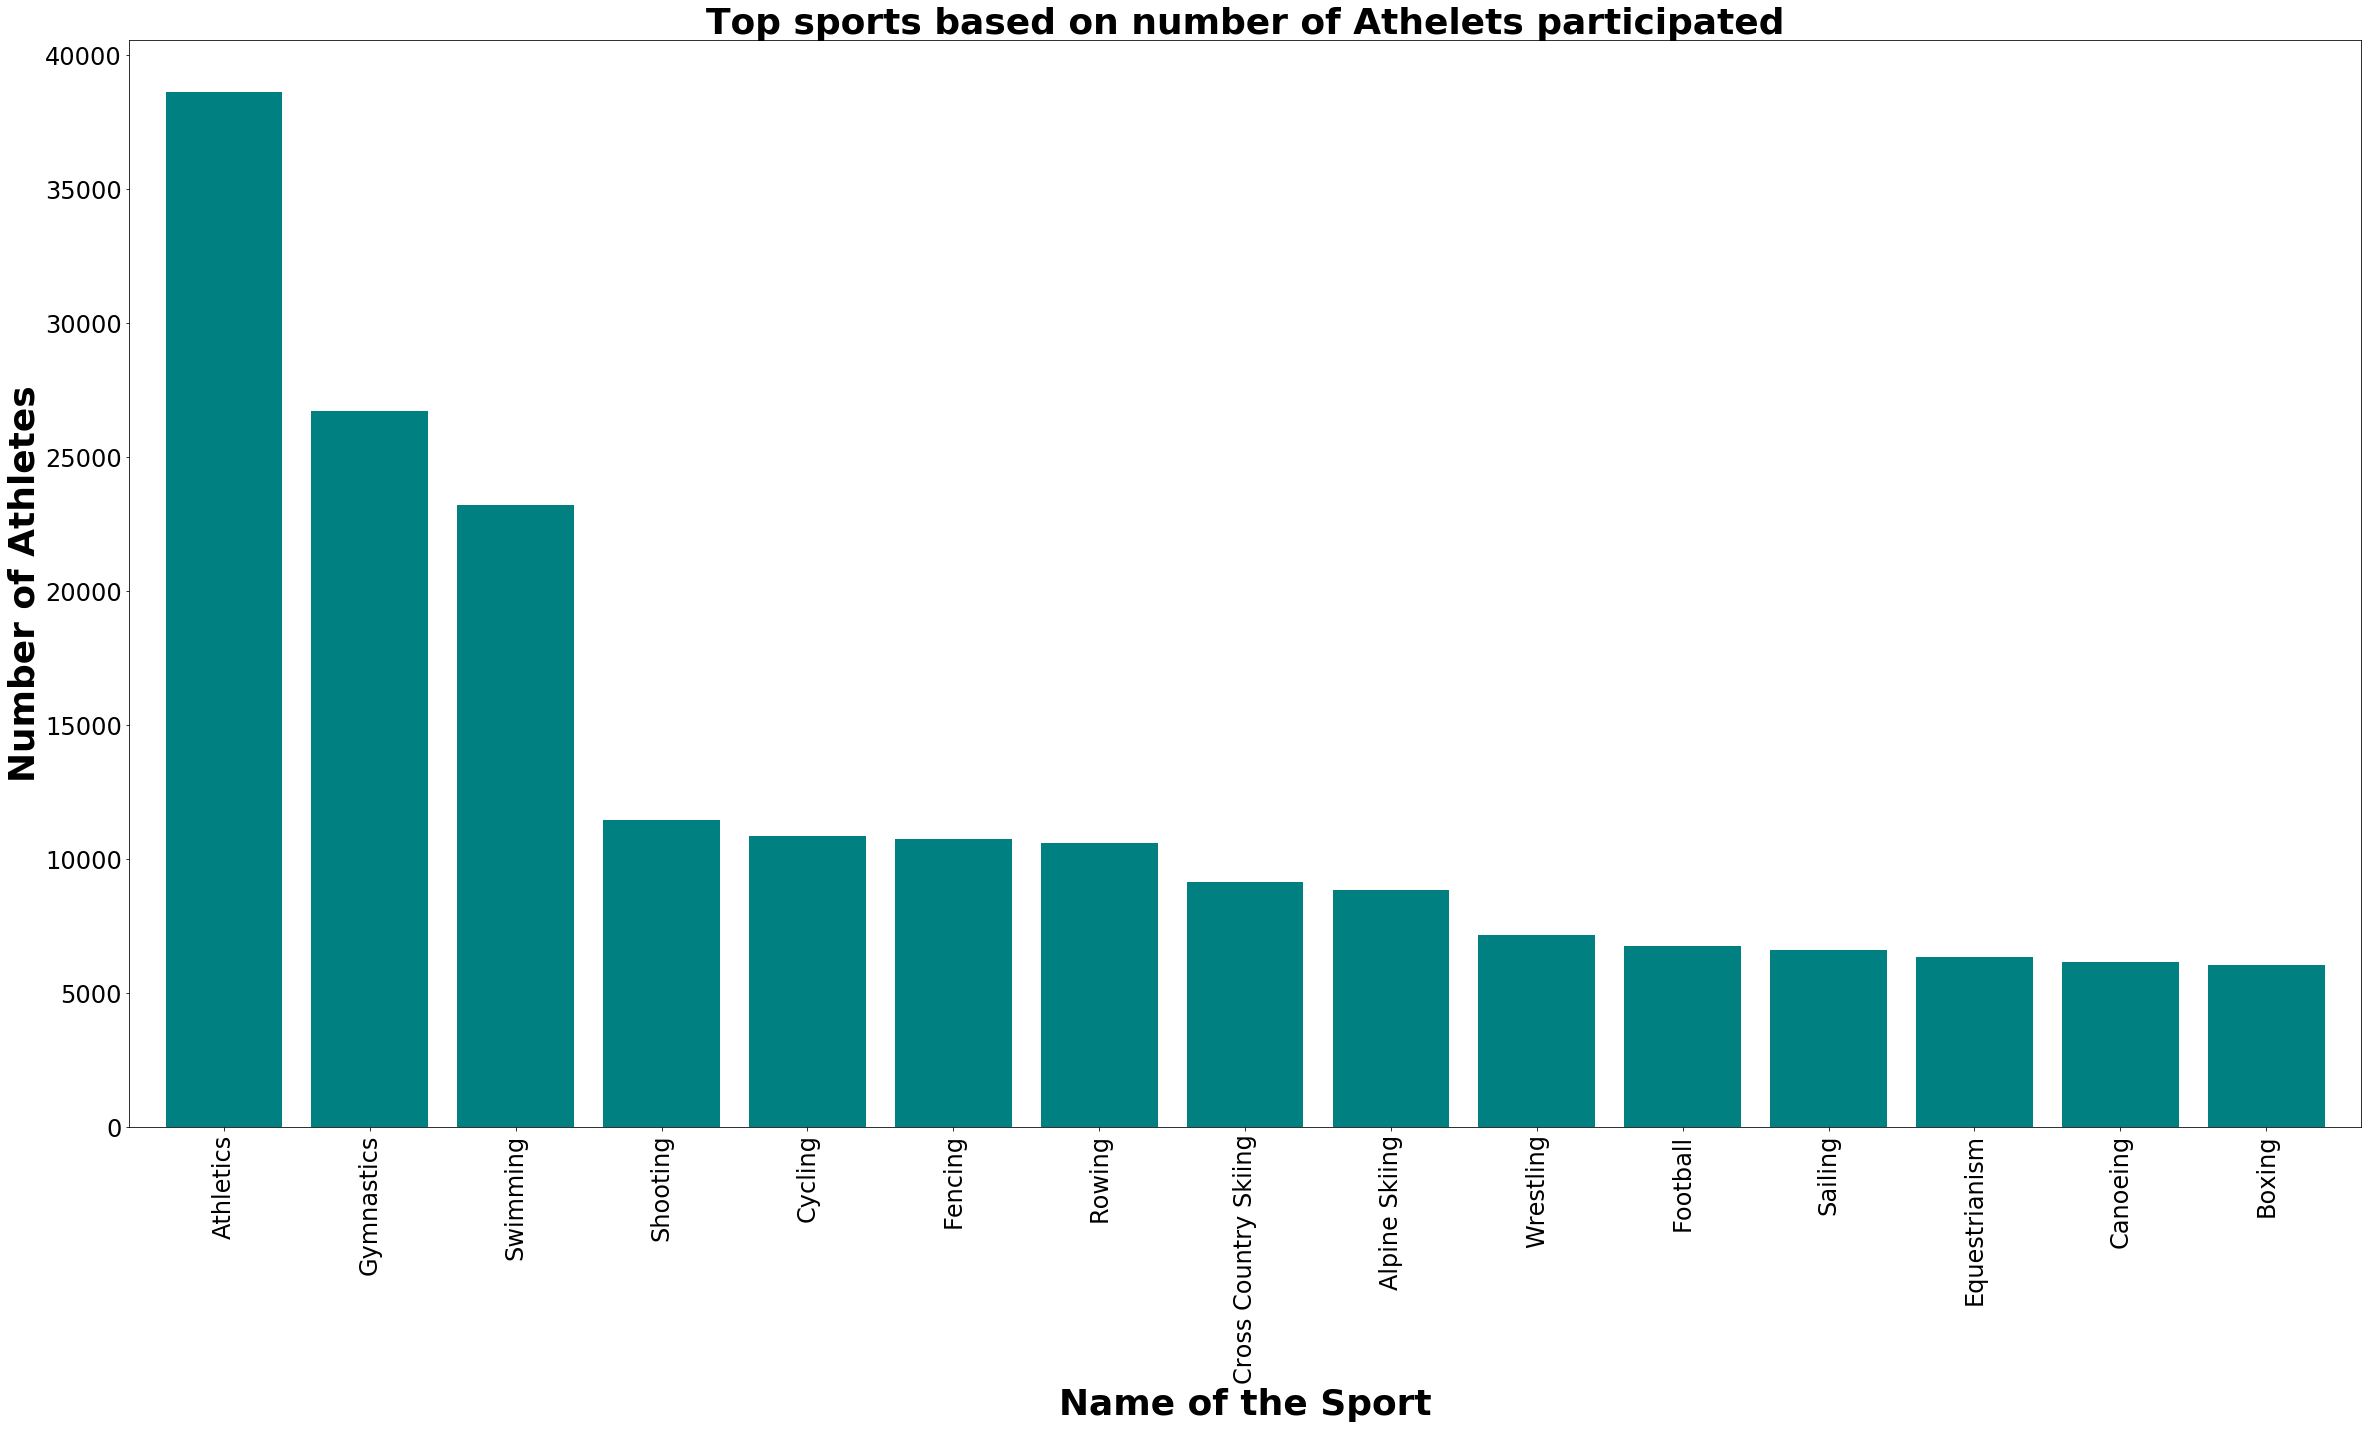

In [13]:
top_sports = data.Sport.value_counts().nlargest(15)
top_sports.plot(kind='Bar',width=0.8, figsize=(40, 20),fontsize=24, color='teal')
plt.title('Top sports based on number of Athelets participated',fontsize=36, fontweight='bold')
plt.xlabel('Name of the Sport', fontsize=36, fontweight='bold')
plt.ylabel('Number of Athletes', fontsize=36, fontweight='bold')
plt.show()

# Data Analysis based on the Weight and Height

## Athletes Weight Data Analysis

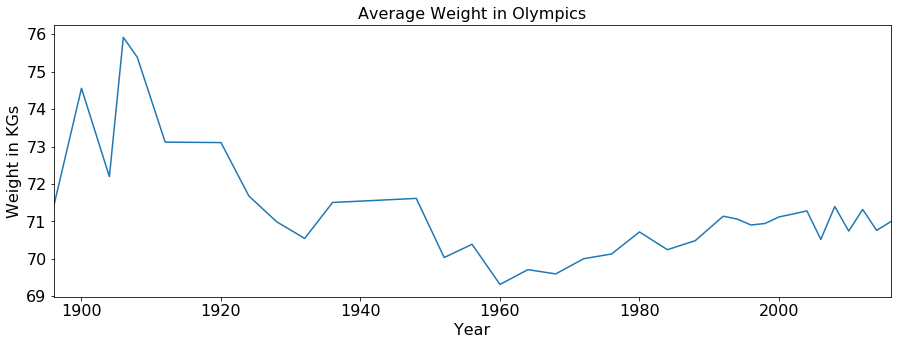

In [14]:
# Since we know there is data with no value for Weight lets take only finite valued data and see the trend over years
weight_data = data[np.isfinite(data['Weight'])]
mean_weight = (weight_data.groupby('Year')['Weight'].mean())
mean_weight.plot(figsize=(15, 5),fontsize=16)
plt.title('Average Weight in Olympics', fontsize=16)
plt.ylabel('Weight in KGs', fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.show()

## Athletes Height Data Analysis

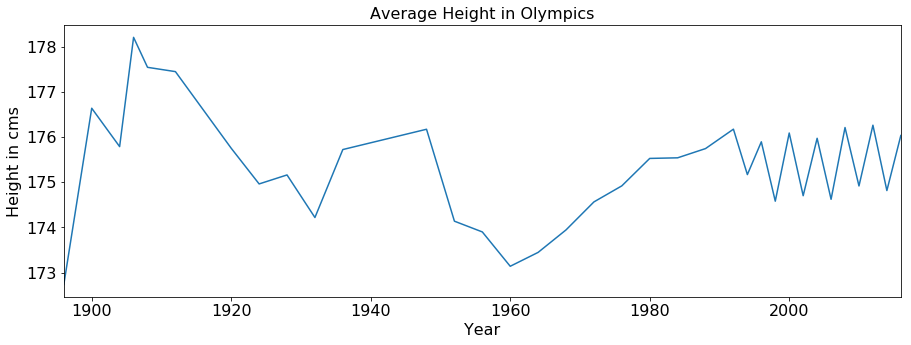

In [15]:
# Since we know there is data with no value for Weight lets take only finite valued data and see the trend over years
height_data = data[np.isfinite(data['Height'])]
mean_height = (height_data.groupby('Year')['Height'].mean())
mean_height.plot(figsize=(15, 5),fontsize=16)
plt.title('Average Height in Olympics', fontsize=16)
plt.ylabel('Height in cms', fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.show()

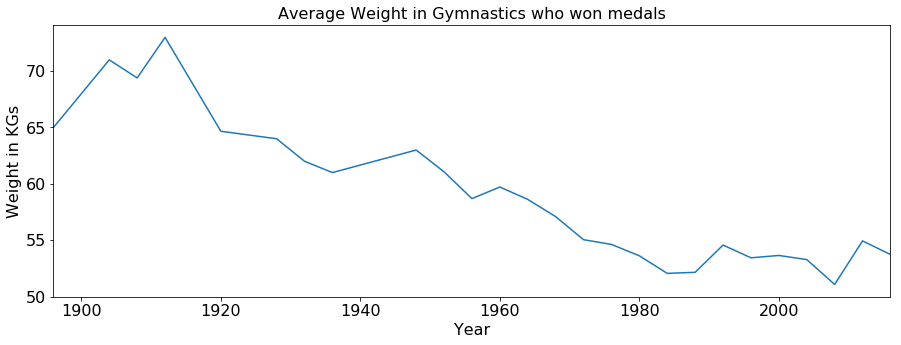

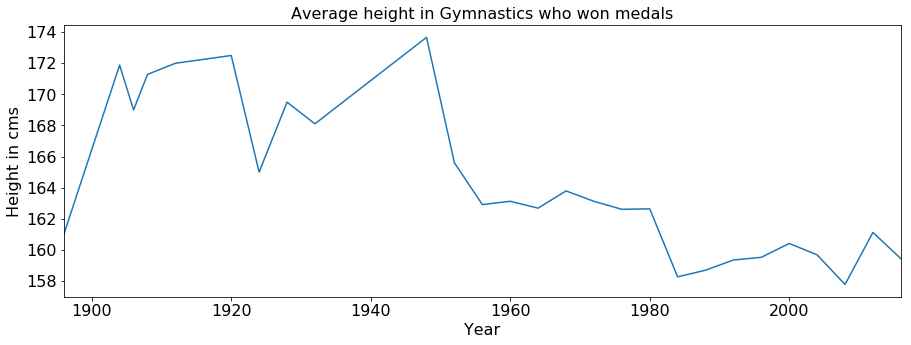

In [16]:
gymnastics = weight_data[weight_data['Sport'] == 'Gymnastics']
gymnastics_medals = gymnastics[gymnastics.Medal.notnull()]
mean_gymnastics_weights = gymnastics_medals.groupby('Year')['Weight'].mean()
mean_gymnastics_weights.plot(figsize=(15, 5),fontsize=16)
plt.title('Average Weight in Gymnastics who won medals', fontsize=16)
plt.ylabel('Weight in KGs', fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.show()
gymnastics = height_data[height_data['Sport'] == 'Gymnastics']
gymnastics_medals = gymnastics[gymnastics.Medal.notnull()]
mean_gymnastics_heights = gymnastics_medals.groupby('Year')['Height'].mean()
mean_gymnastics_heights.plot(figsize=(15, 5),fontsize=16)
plt.title('Average height in Gymnastics who won medals', fontsize=16)
plt.ylabel('Height in cms', fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.show()

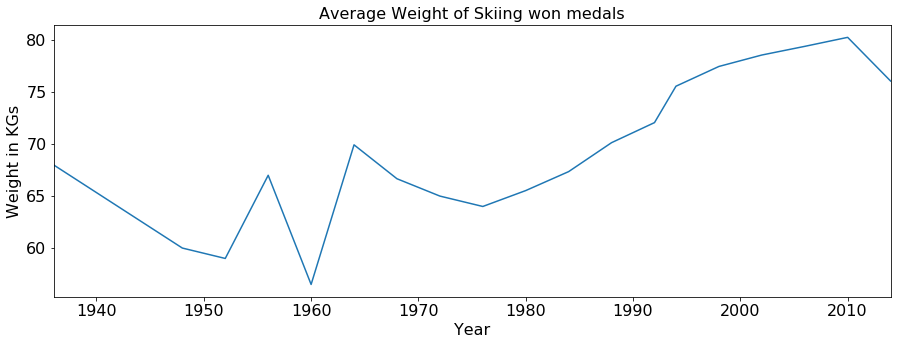

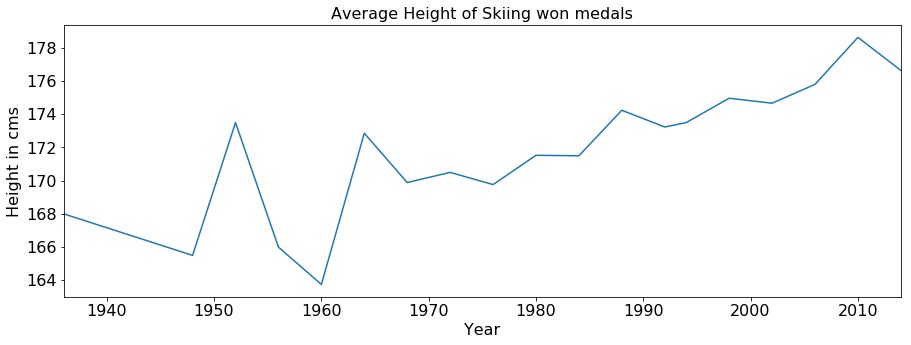

In [17]:
skiing = weight_data[weight_data['Sport'] == 'Alpine Skiing']
skiing_medals = skiing[skiing.Medal.notnull()]
mean_skiing_weights = skiing_medals.groupby('Year')['Weight'].mean()
mean_skiing_weights.plot(figsize=(15, 5),fontsize=16)
plt.title('Average Weight of Skiing won medals', fontsize=16)
plt.ylabel('Weight in KGs', fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.show()
skiing = height_data[height_data['Sport'] == 'Alpine Skiing']
skiing_medals = skiing[skiing.Medal.notnull()]
mean_skiing_heights = skiing_medals.groupby('Year')['Height'].mean()
mean_skiing_heights.plot(figsize=(15, 5),fontsize=16)
plt.title('Average Height of Skiing won medals', fontsize=16)
plt.ylabel('Height in cms', fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.show()

**We can see that the Weight and Height of Skiing Atheletes who won the medals increased while Weight and Height of Gymnastics Atheletes who won the medals this is because gymnastics need less weight and height to achive good balance while skiing needs more height and weight to reach more distance and increase speed**

In [18]:
top_teams = data.Team.value_counts().nlargest(30)
print(top_teams[:10])

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64


In [19]:
top_teams_medal_count = medal_data.Team.value_counts().nlargest(30)
print(top_teams_medal_count[:10])

United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Team, dtype: int64


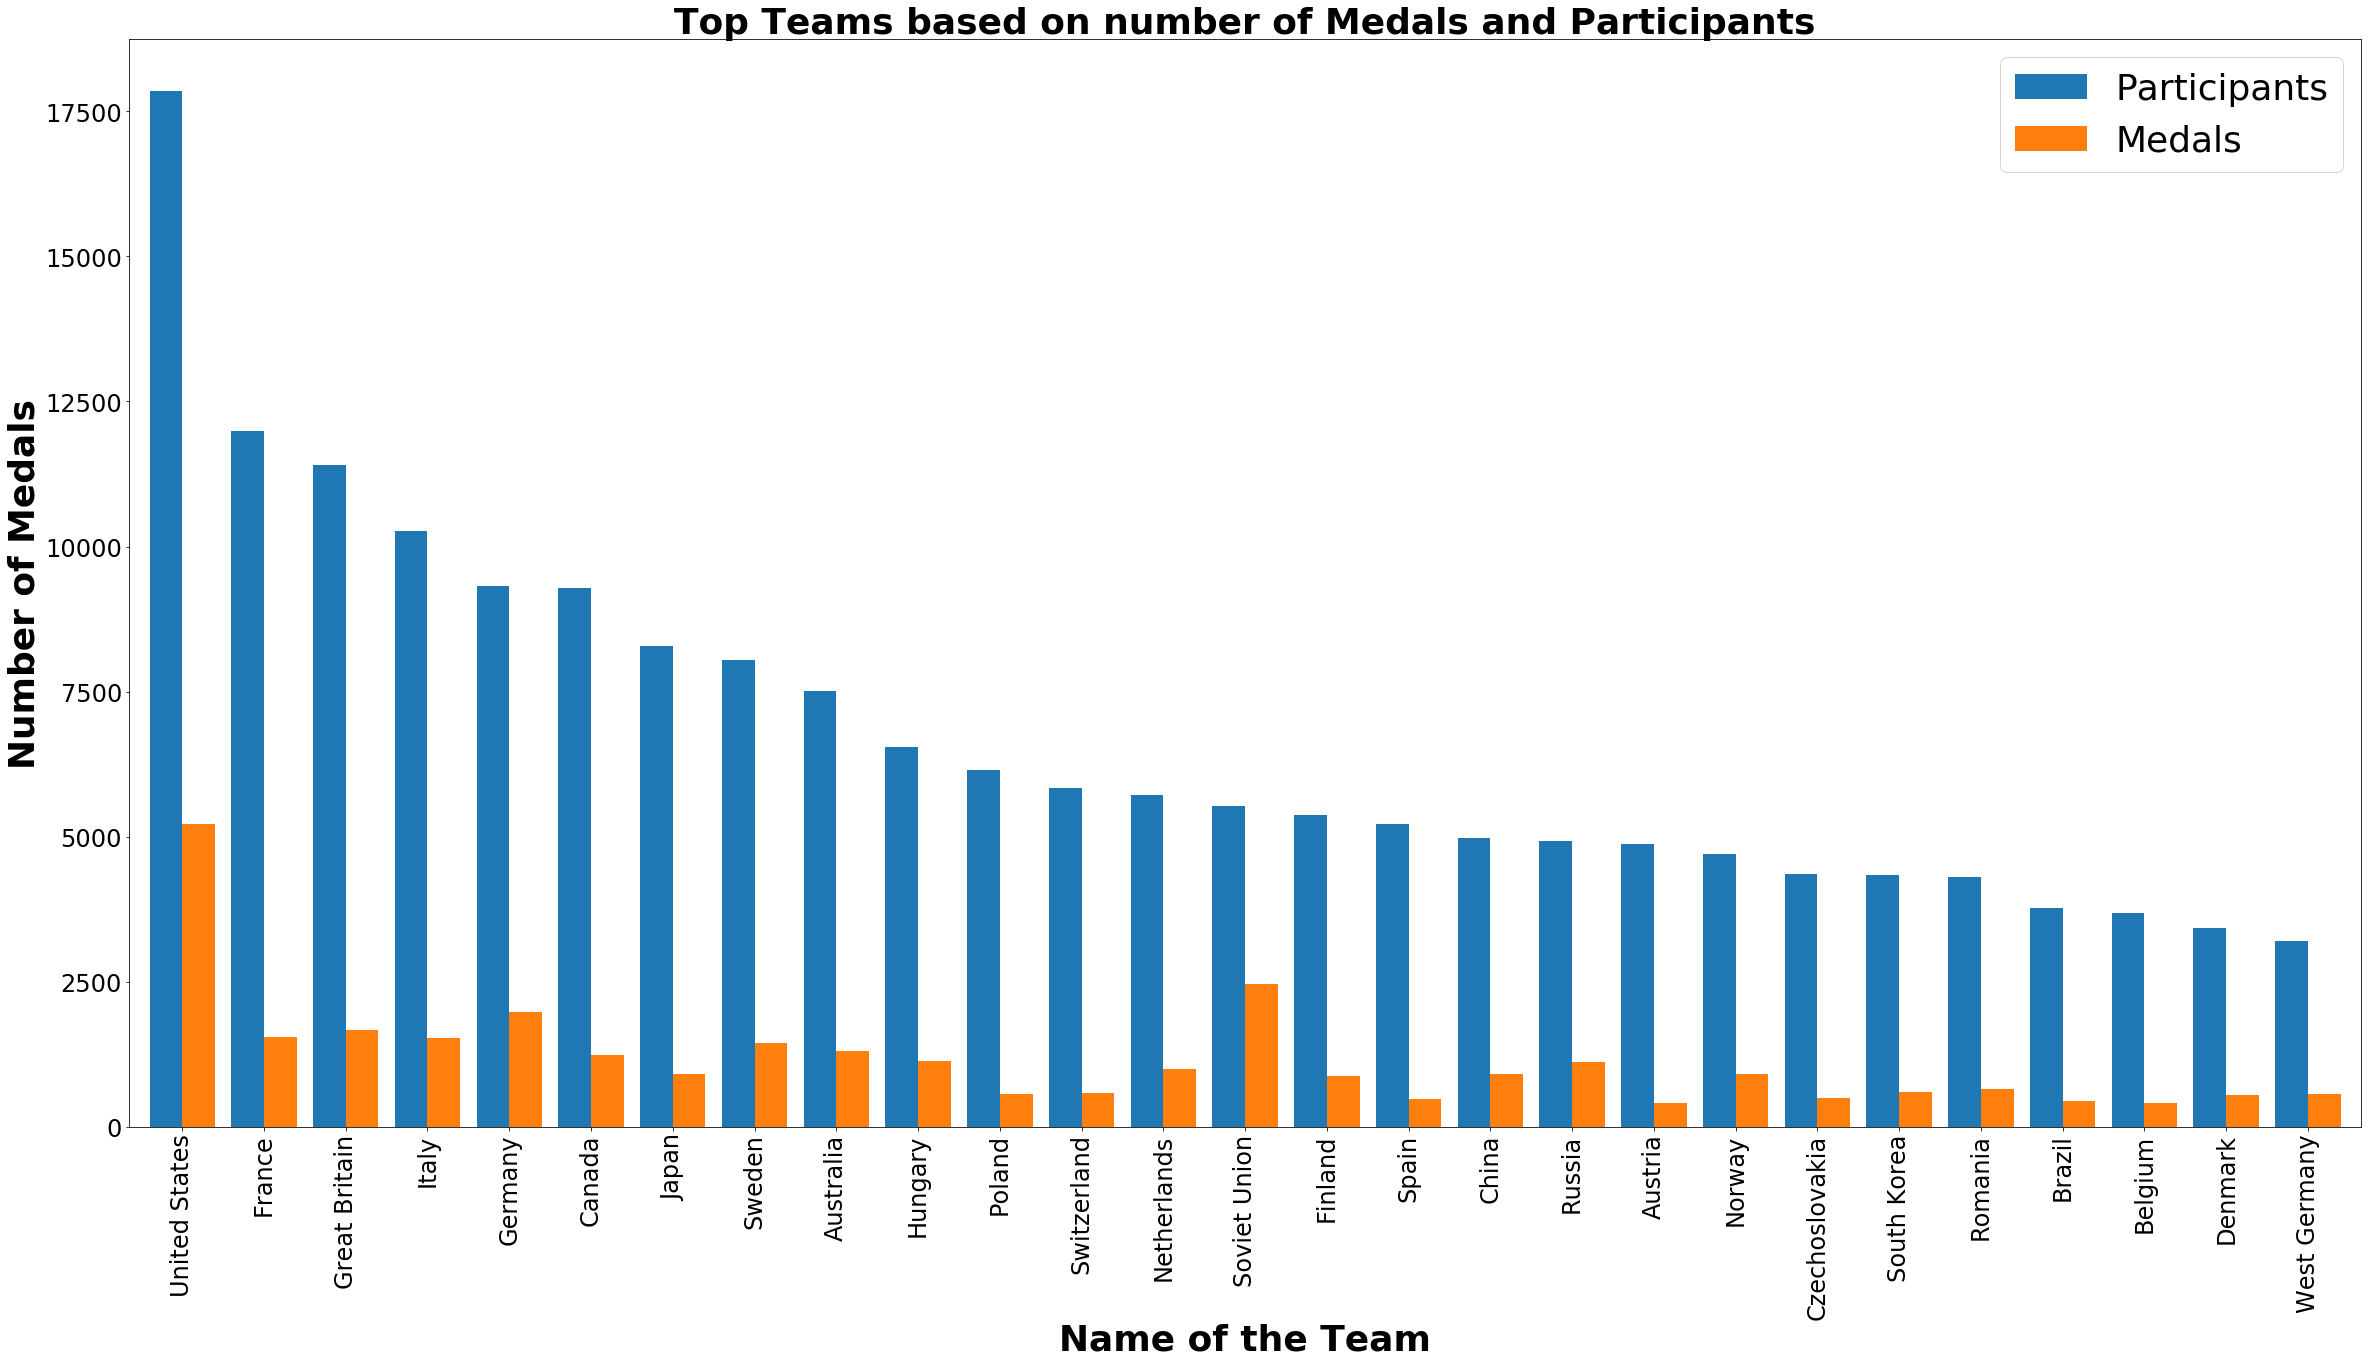

In [20]:
dataf = pd.DataFrame({'Participants': top_teams, 'Medals' : top_teams_medal_count})
dataf = dataf.dropna().sort_values(by='Participants', ascending=False)
dataf.plot(kind='bar',width=0.8, figsize=(40, 20),fontsize=24)
plt.title('Top Teams based on number of Medals and Participants',fontsize=36, fontweight='bold')
plt.xlabel('Name of the Team', fontsize=36, fontweight='bold')
plt.ylabel('Number of Medals', fontsize=36, fontweight='bold')
plt.legend(fontsize=36)
plt.show()

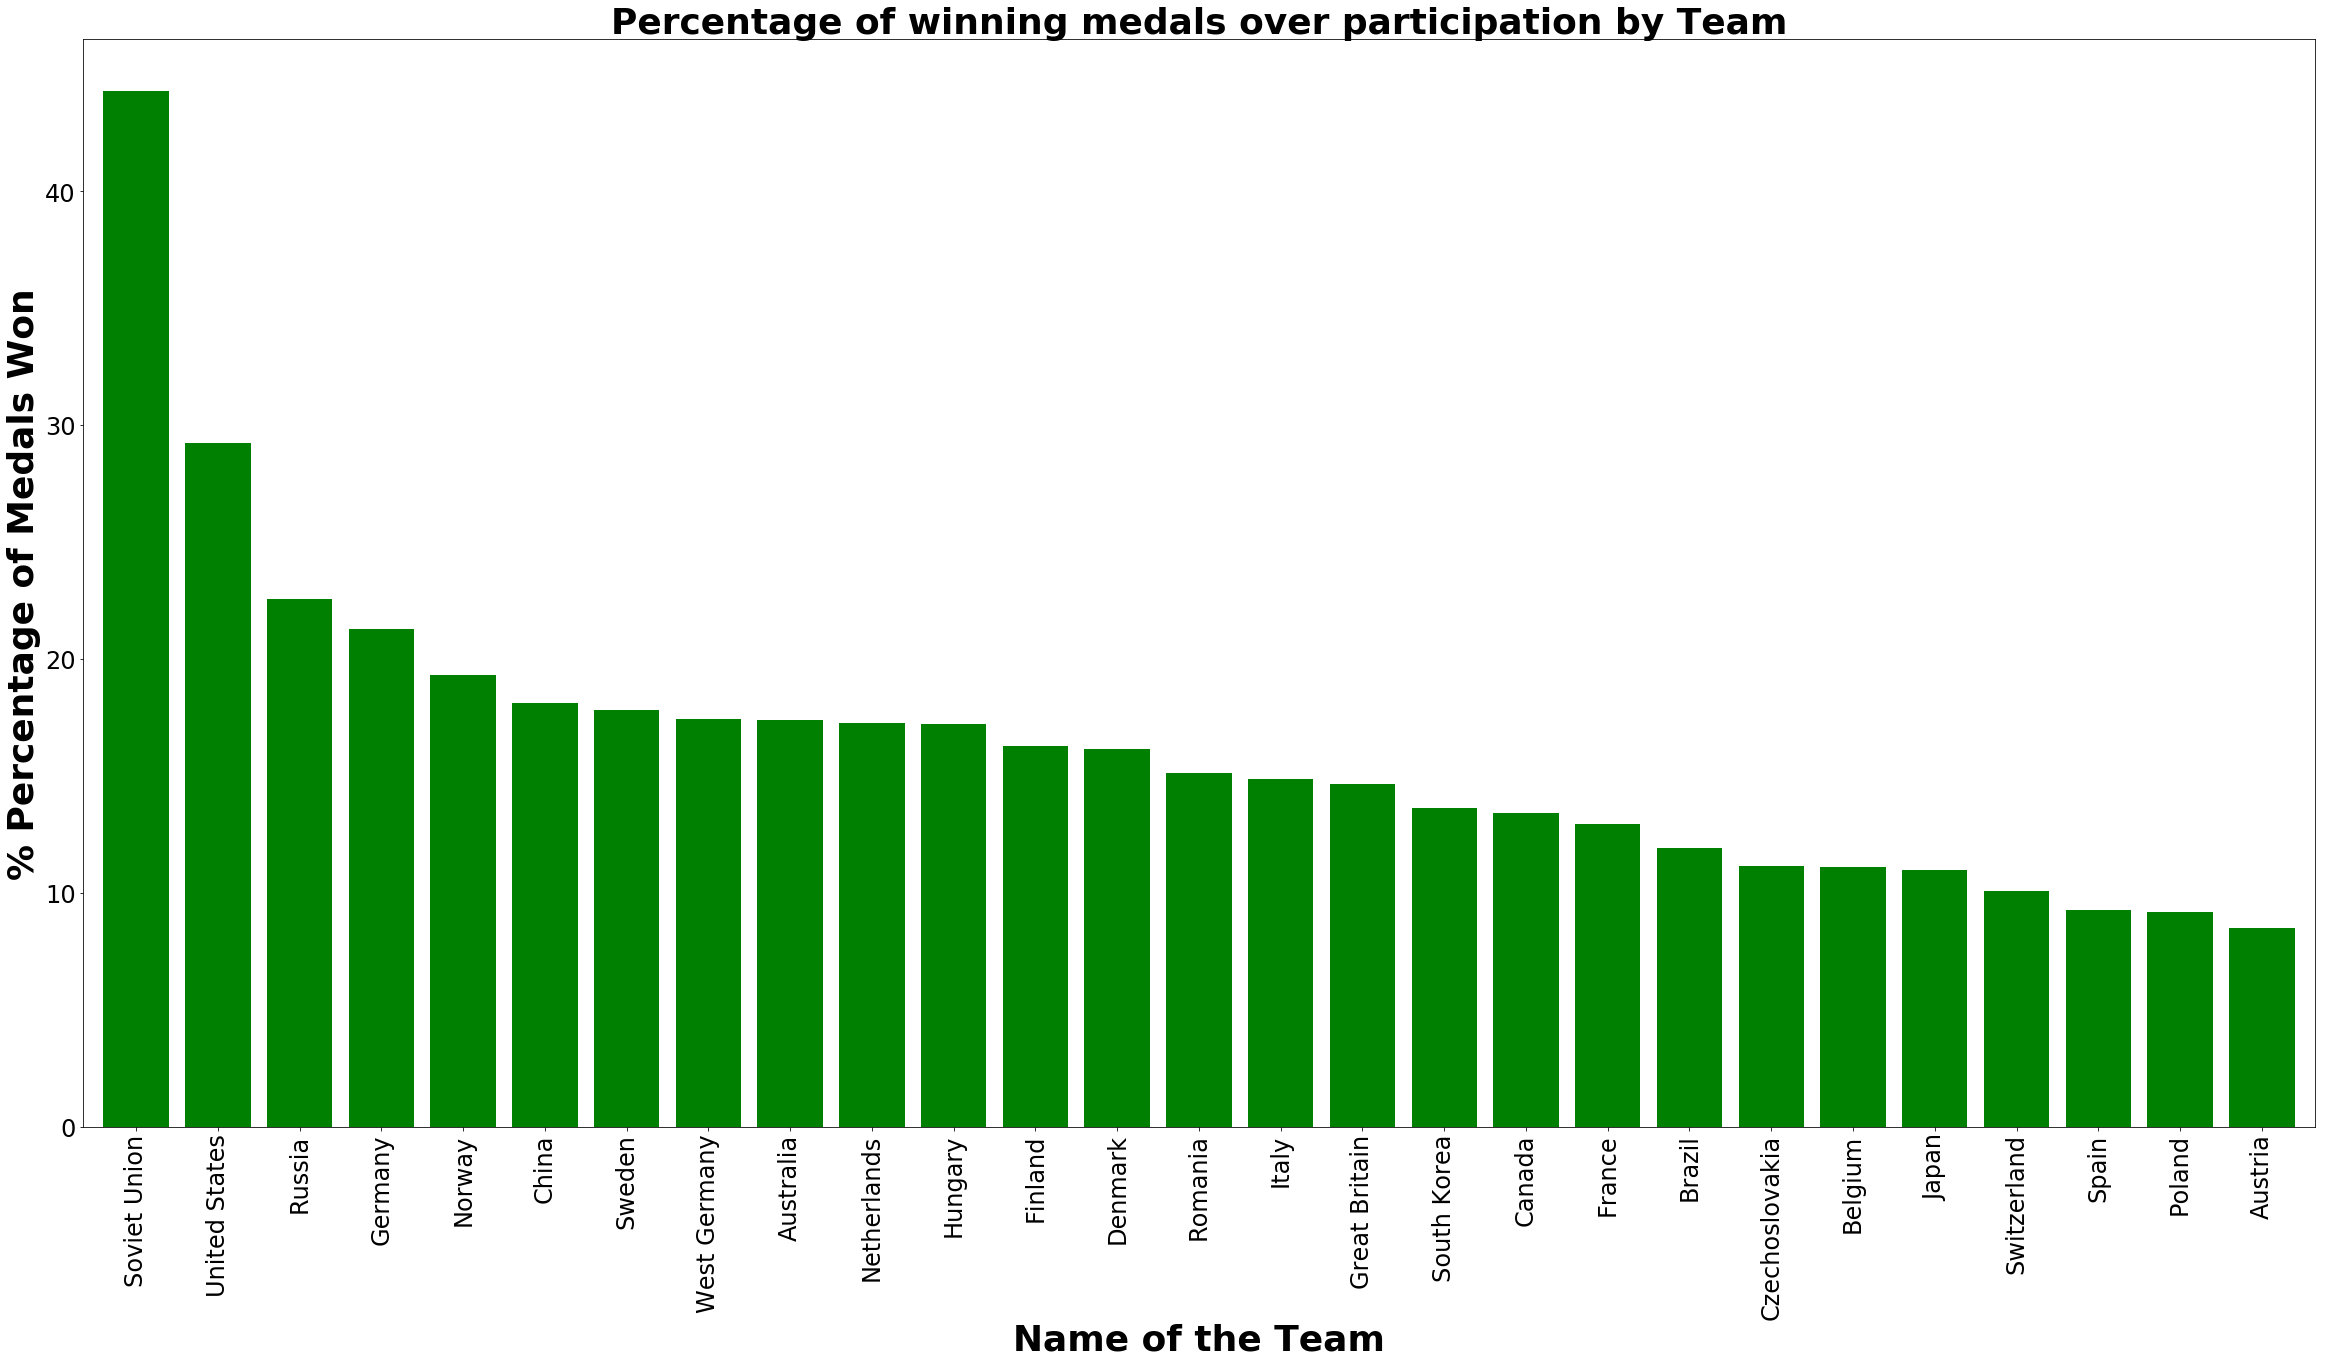

In [21]:
medal_ratio = (top_teams_medal_count.div(top_teams)).mul(100).sort_values(ascending=False)
medal_ratio = medal_ratio.dropna()
medal_ratio.plot(kind='Bar',width=0.8, figsize=(40, 20),fontsize=24, color='green')
plt.title('Percentage of winning medals over participation by Team',fontsize=36, fontweight='bold')
plt.xlabel('Name of the Team', fontsize=36, fontweight='bold')
plt.ylabel('% Percentage of Medals Won', fontsize=36, fontweight='bold')
plt.show()

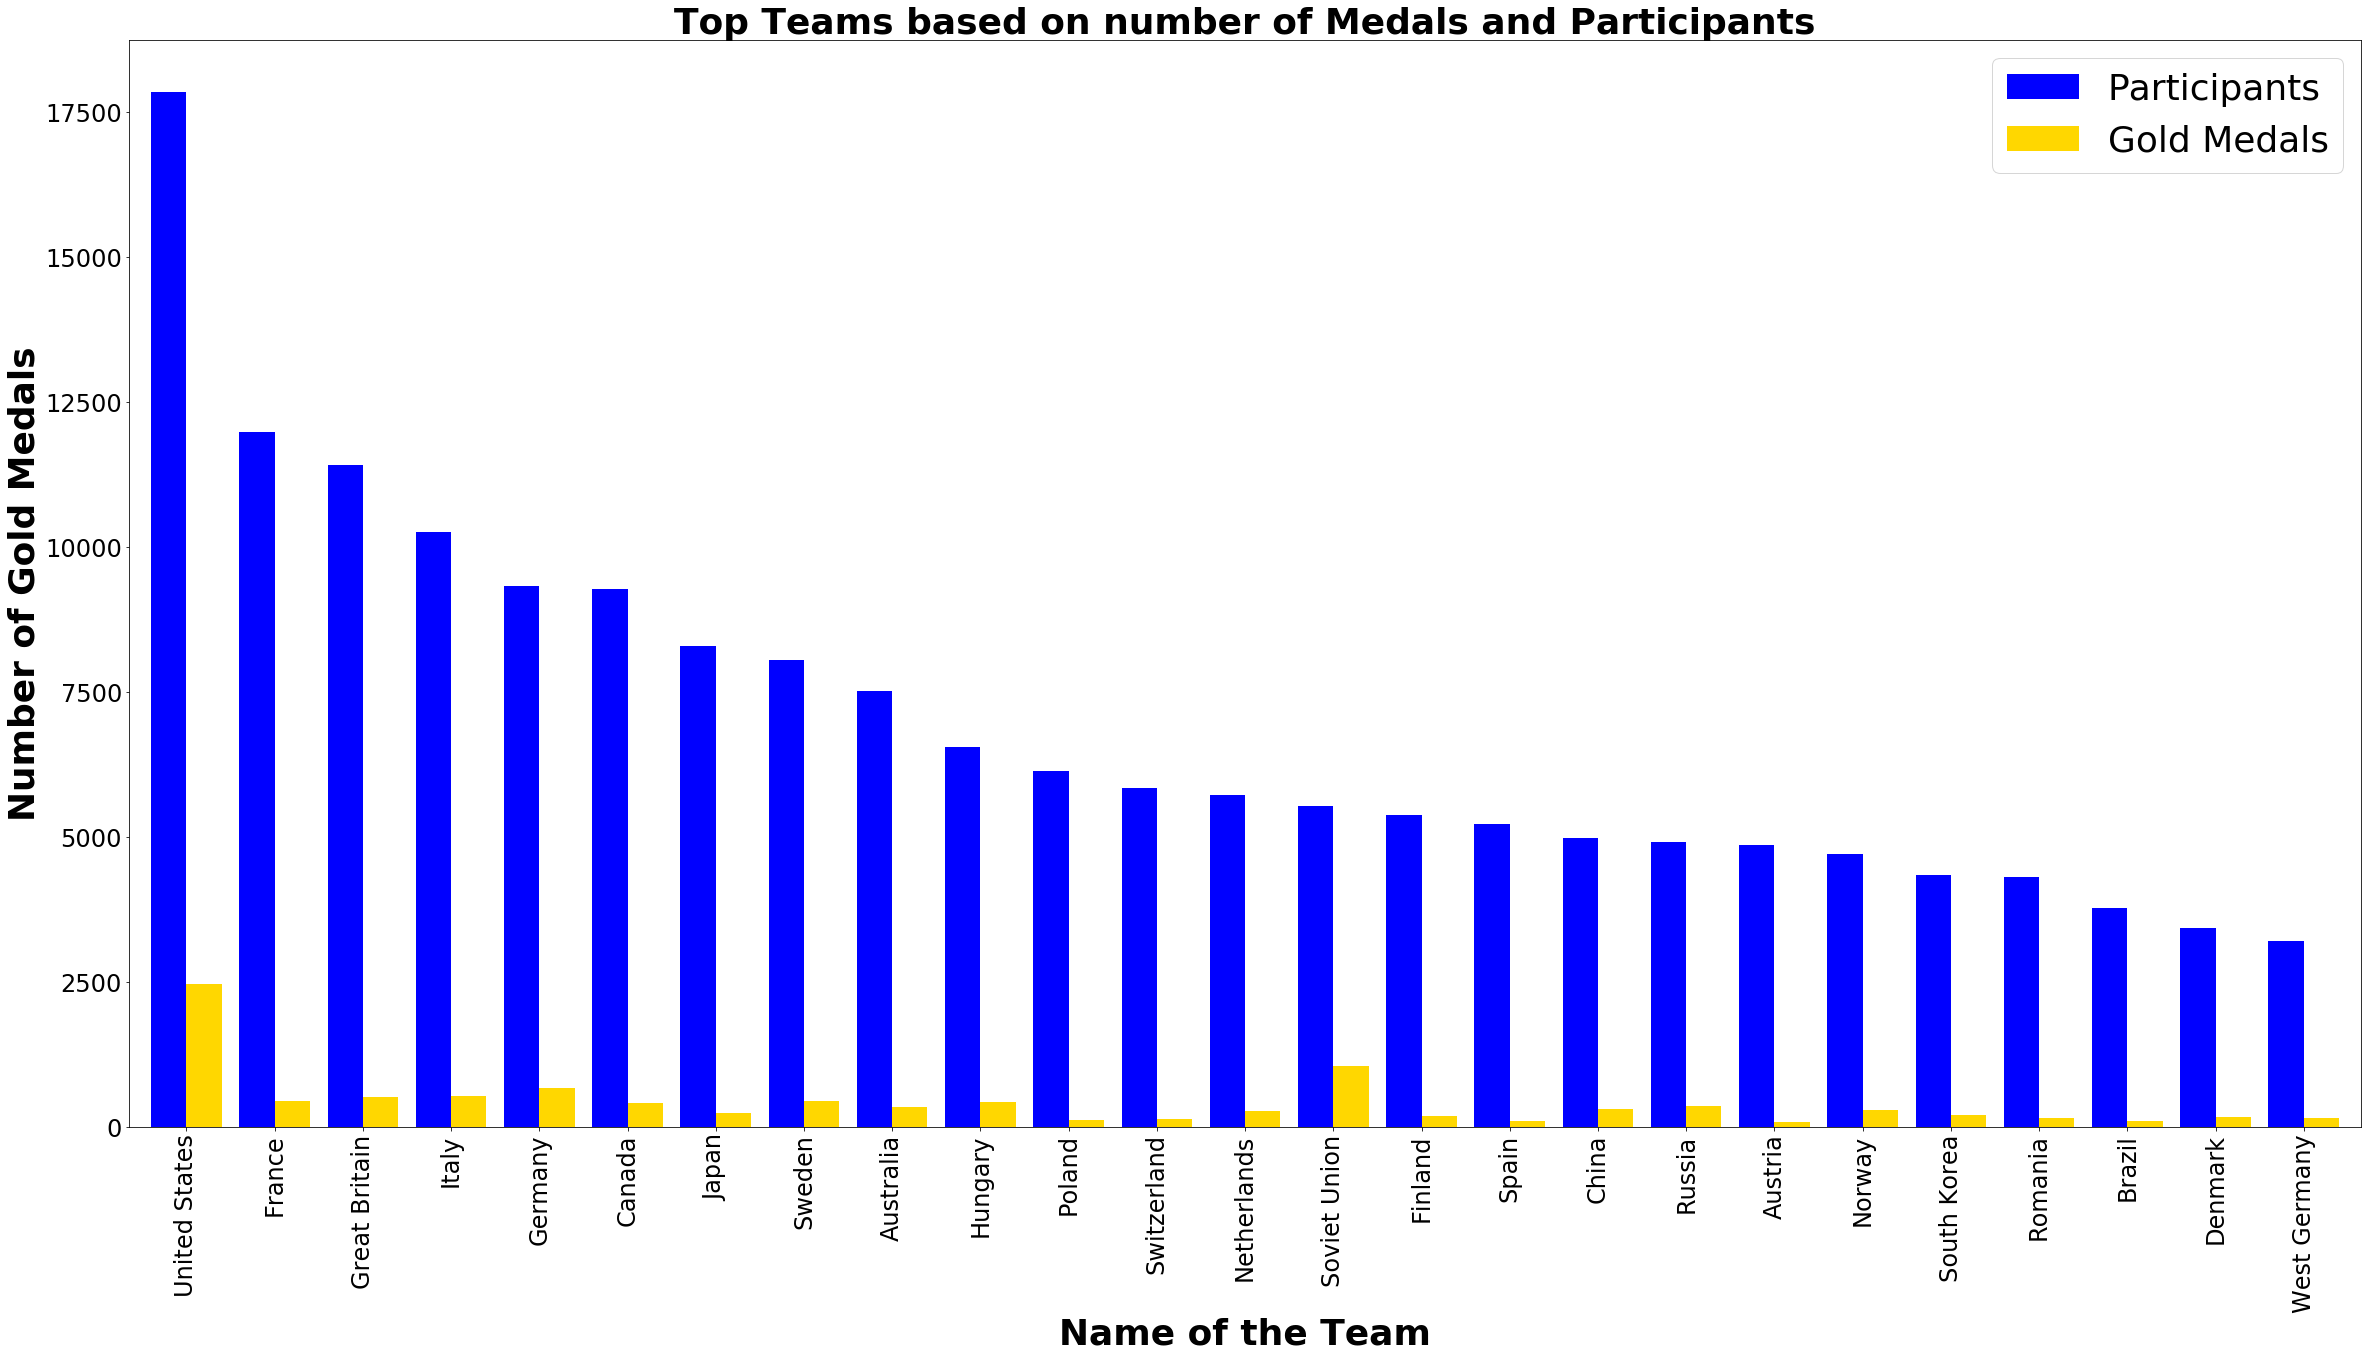

In [22]:
gold_medals = data[data.Medal == 'Gold']
top_teams_gold_medal = gold_medals.Team.value_counts().nlargest(30)
dataf = pd.DataFrame({'Participants': top_teams, 'Gold Medals' : top_teams_gold_medal})
dataf = dataf.dropna().sort_values(by='Participants', ascending=False)
dataf.plot(kind='bar',width=0.8, figsize=(40, 20),fontsize=24, color=['blue', 'gold'])
plt.title('Top Teams based on number of Medals and Participants',fontsize=36, fontweight='bold')
plt.xlabel('Name of the Team', fontsize=36, fontweight='bold')
plt.ylabel('Number of Gold Medals', fontsize=36, fontweight='bold')
plt.legend(fontsize=36)
plt.show()

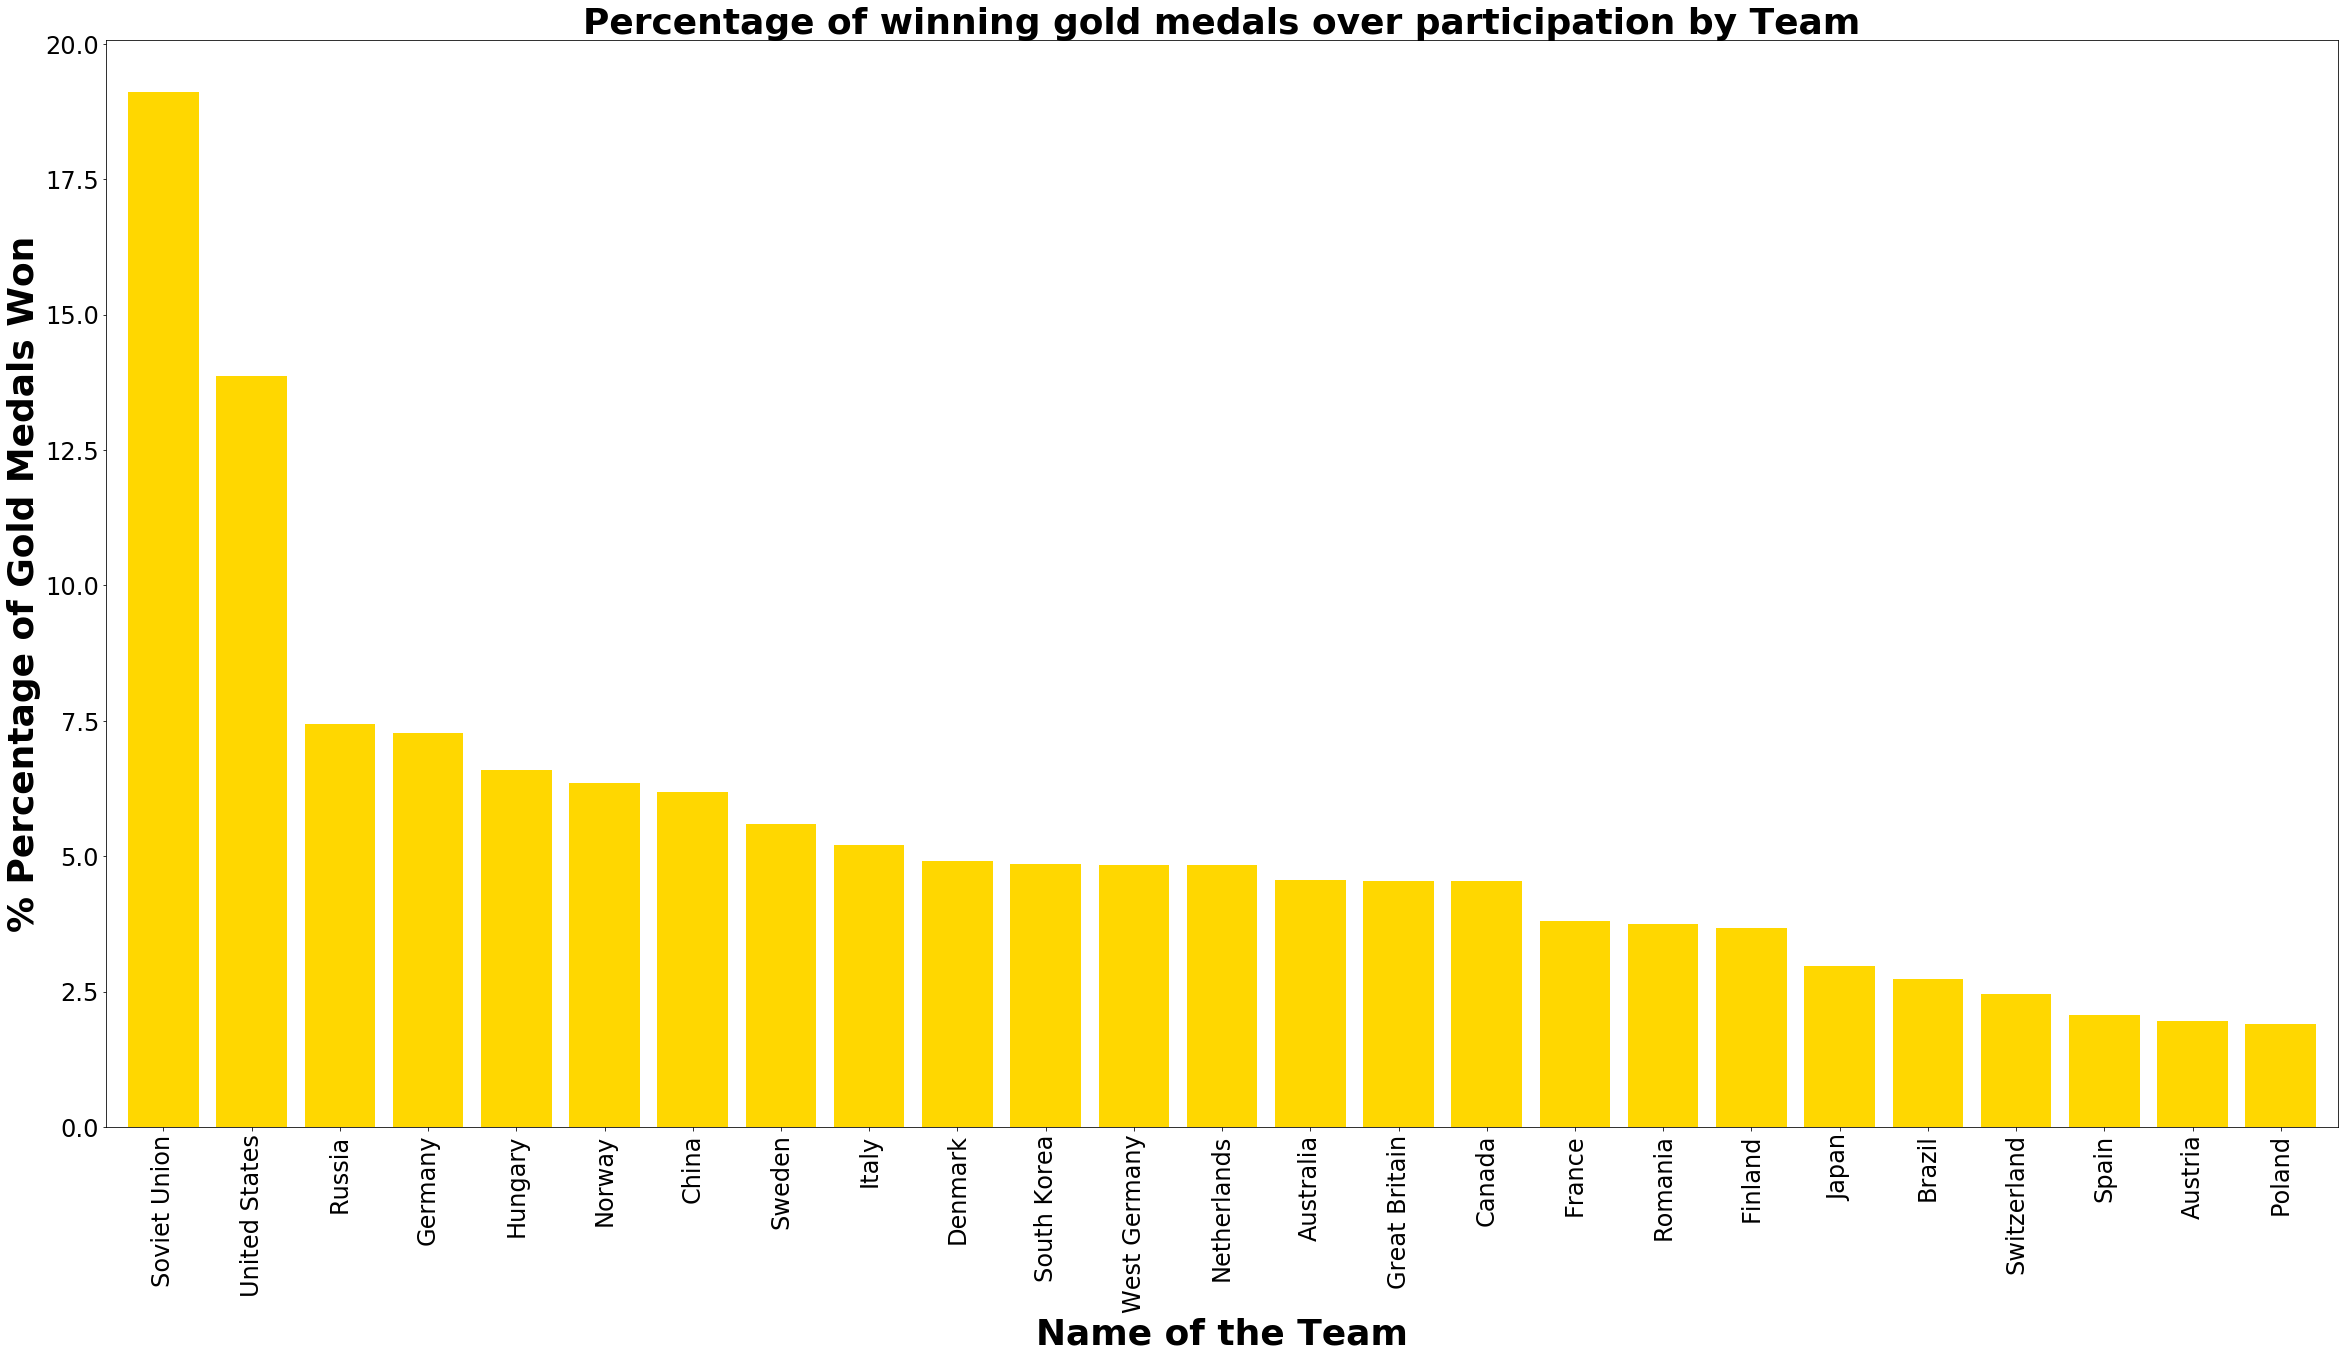

In [23]:
gold_medal_ratio = (top_teams_gold_medal.div(top_teams)).mul(100).sort_values(ascending=False)
gold_medal_ratio = gold_medal_ratio.dropna()
gold_medal_ratio.plot(kind='Bar',width=0.8, figsize=(40, 20),fontsize=24, color='gold')
plt.title('Percentage of winning gold medals over participation by Team',fontsize=36, fontweight='bold')
plt.xlabel('Name of the Team', fontsize=36, fontweight='bold')
plt.ylabel('% Percentage of Gold Medals Won', fontsize=36, fontweight='bold')
plt.show()

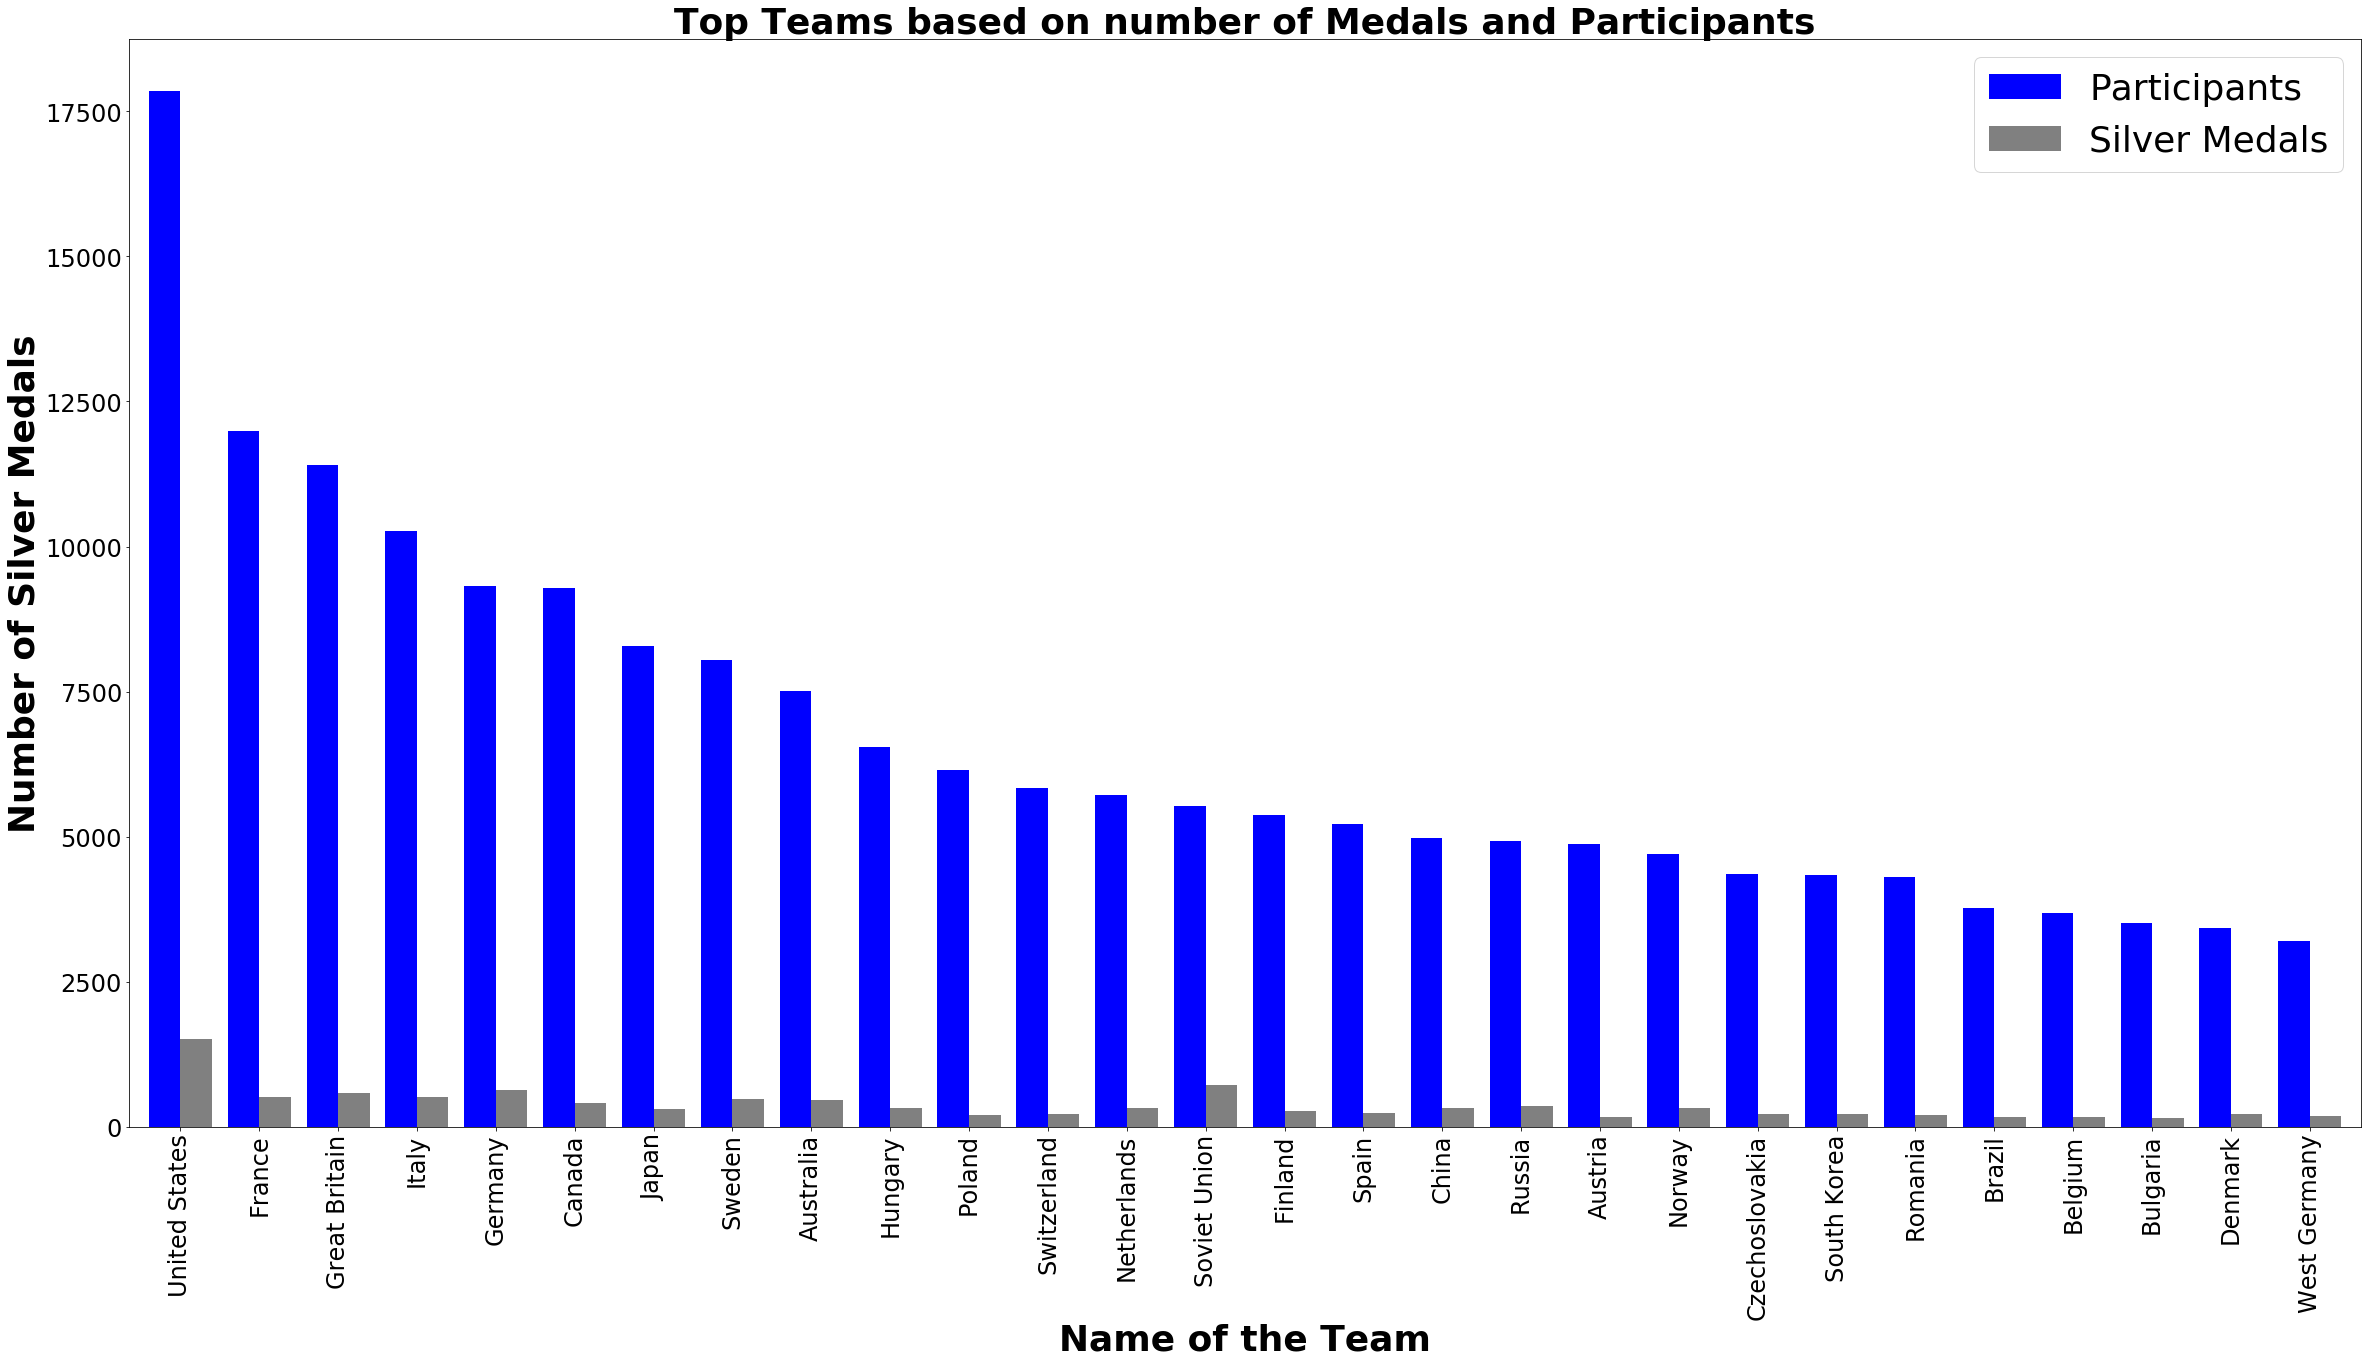

In [24]:
silver_medals = data[data.Medal == 'Silver']
top_teams_silver_medal = silver_medals.Team.value_counts().nlargest(30)
dataf = pd.DataFrame({'Participants': top_teams, 'Silver Medals' : top_teams_silver_medal})
dataf = dataf.dropna().sort_values(by='Participants', ascending=False)
dataf.plot(kind='bar',width=0.8, figsize=(40, 20),fontsize=24, color=['blue', 'grey'])
plt.title('Top Teams based on number of Medals and Participants',fontsize=36, fontweight='bold')
plt.xlabel('Name of the Team', fontsize=36, fontweight='bold')
plt.ylabel('Number of Silver Medals', fontsize=36, fontweight='bold')
plt.legend(fontsize=36)
plt.show()

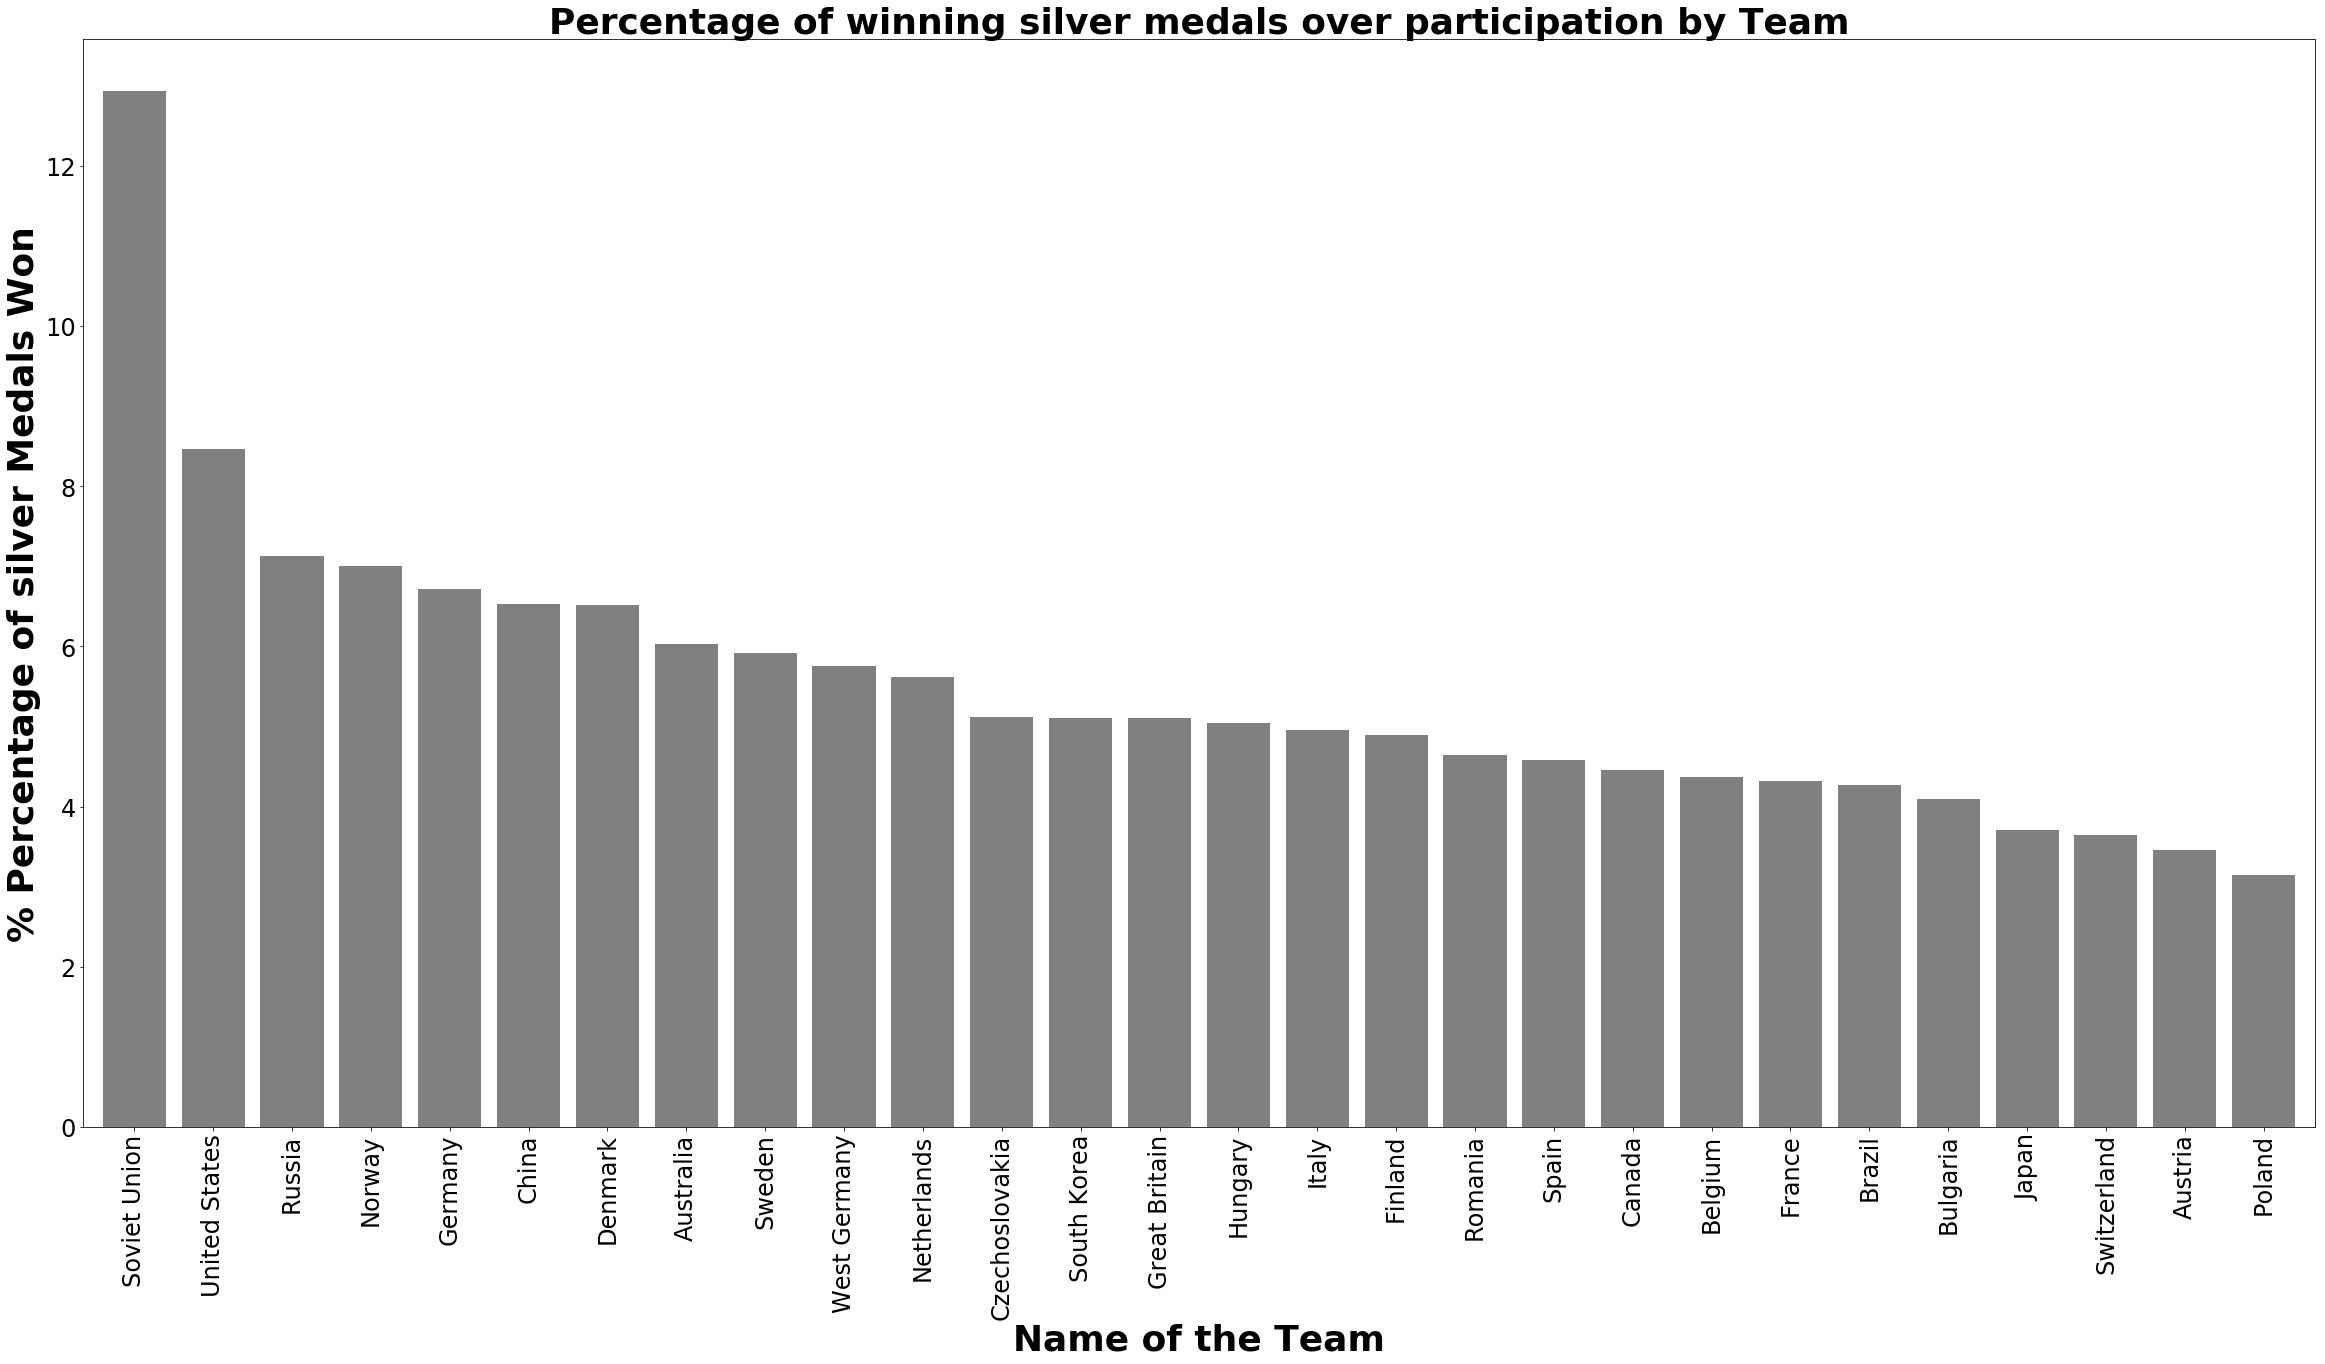

In [25]:
silver_medal_ratio = (top_teams_silver_medal.div(top_teams)).mul(100).sort_values(ascending=False)
silver_medal_ratio = silver_medal_ratio.dropna()
silver_medal_ratio.plot(kind='Bar',width=0.8, figsize=(40, 20),fontsize=24, color='grey')
plt.title('Percentage of winning silver medals over participation by Team',fontsize=36, fontweight='bold')
plt.xlabel('Name of the Team', fontsize=36, fontweight='bold')
plt.ylabel('% Percentage of silver Medals Won', fontsize=36, fontweight='bold')
plt.show()

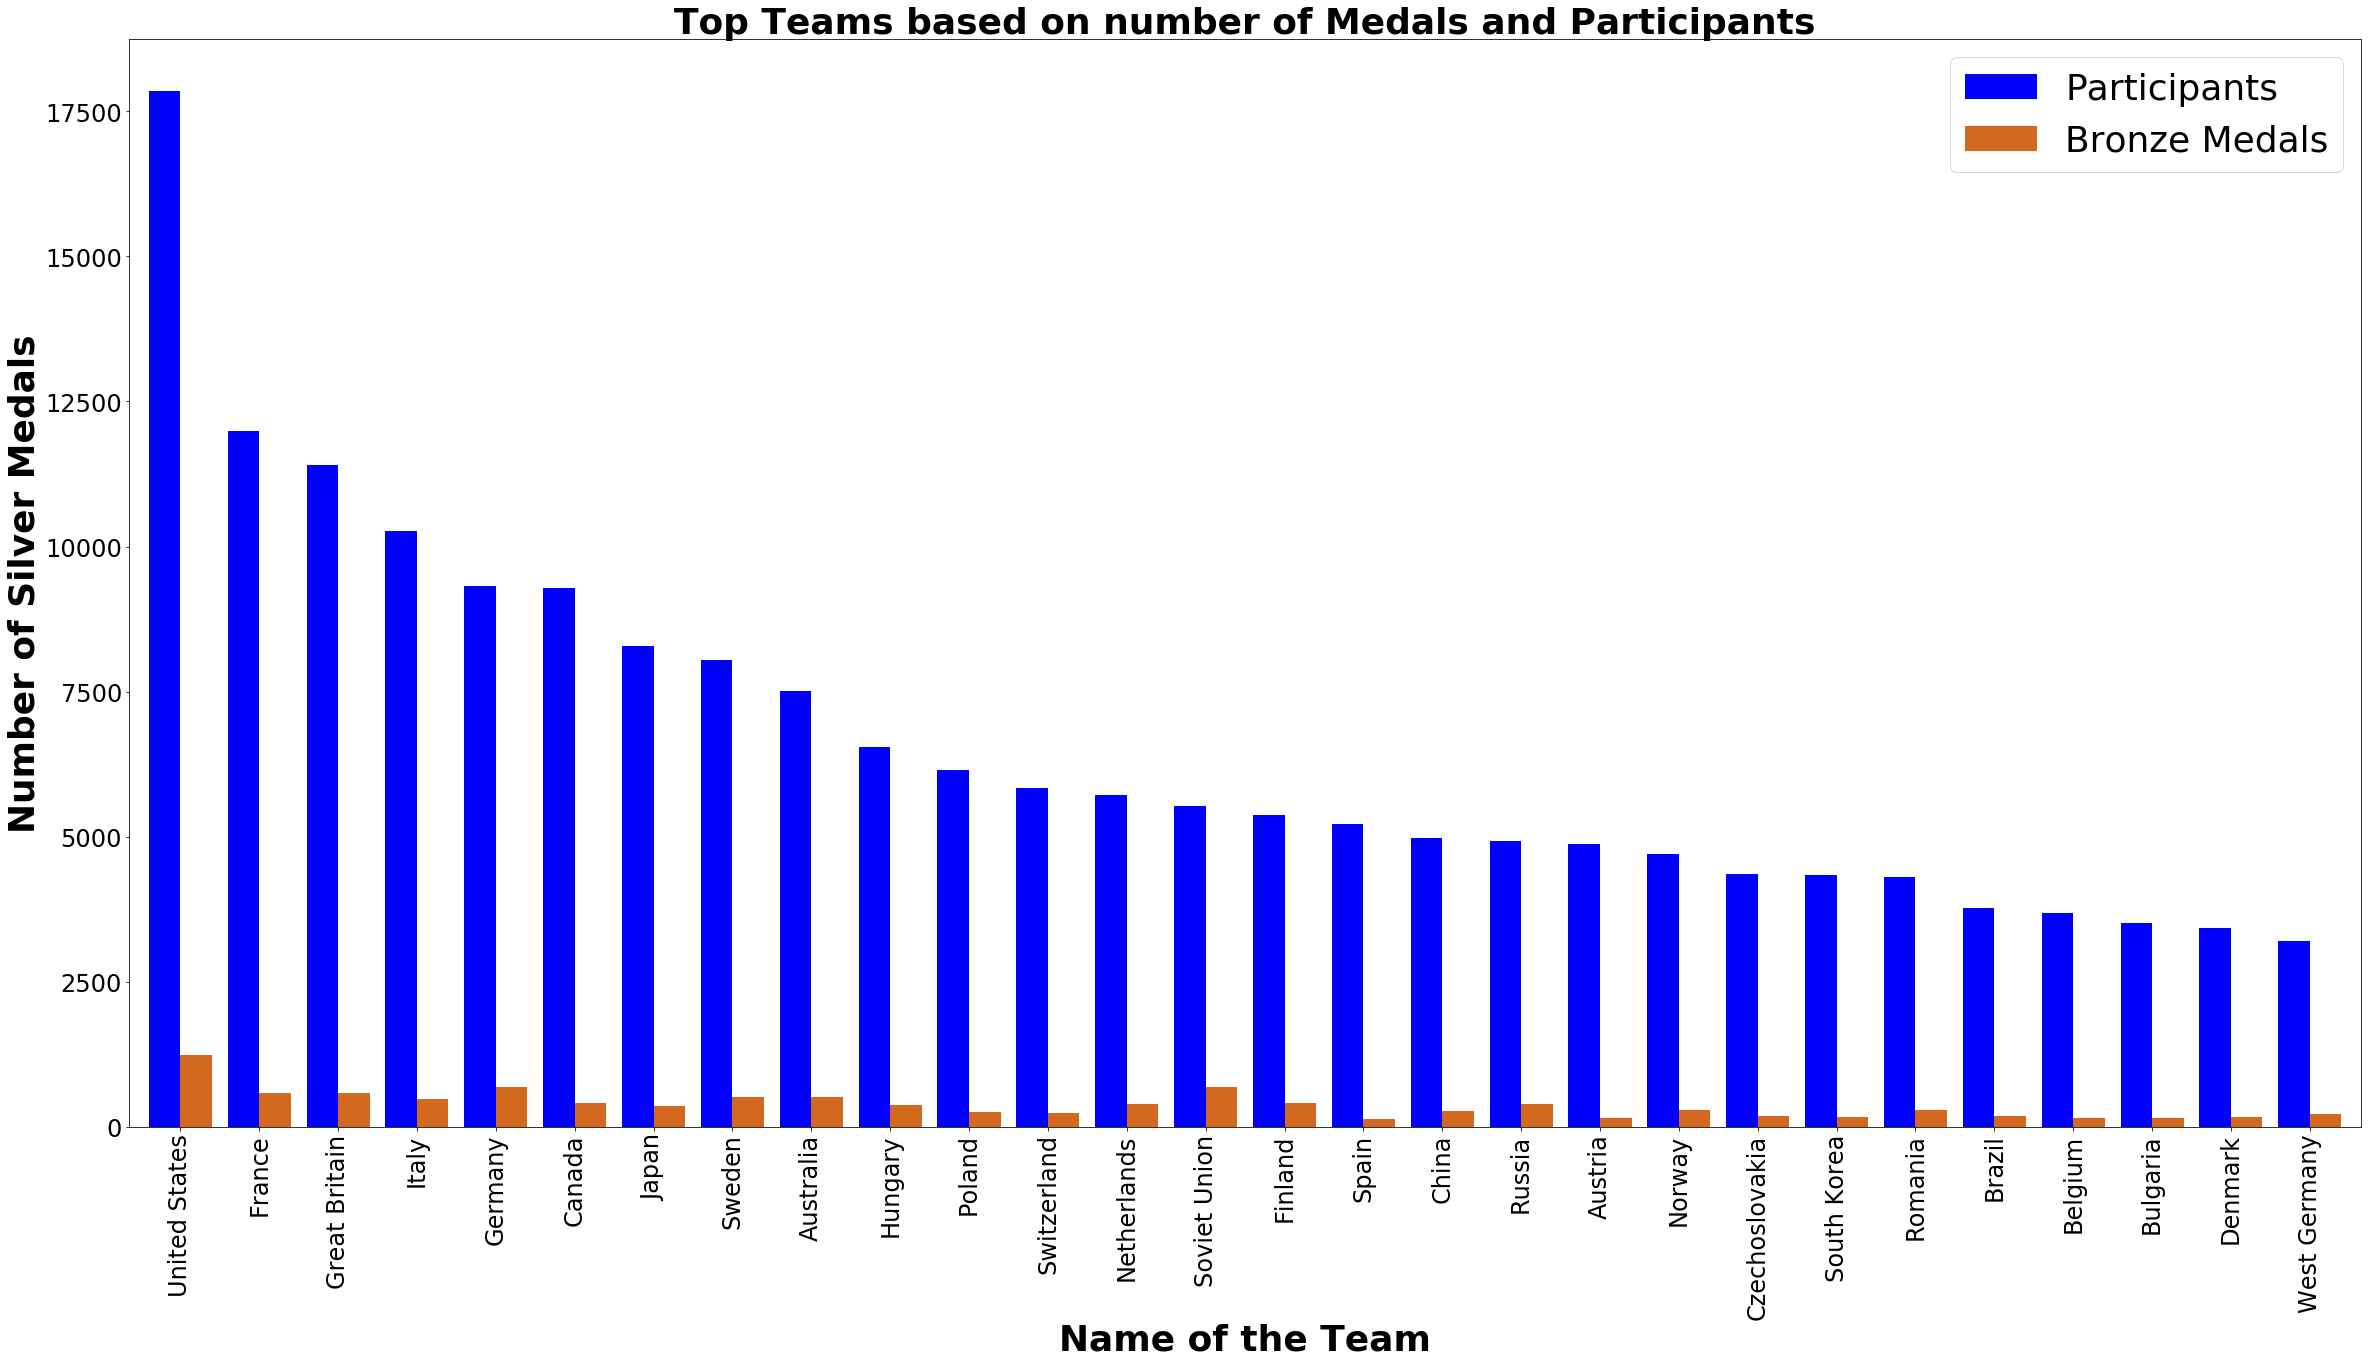

In [26]:
bronze_medals = data[data.Medal == 'Bronze']
top_teams_bronze_medal = bronze_medals.Team.value_counts().nlargest(30)
dataf = pd.DataFrame({'Participants': top_teams, 'Bronze Medals' : top_teams_bronze_medal})
dataf = dataf.dropna().sort_values(by='Participants', ascending=False)
dataf.plot(kind='bar',width=0.8, figsize=(40, 20),fontsize=24, color=['blue', 'chocolate'])
plt.title('Top Teams based on number of Medals and Participants',fontsize=36, fontweight='bold')
plt.xlabel('Name of the Team', fontsize=36, fontweight='bold')
plt.ylabel('Number of Silver Medals', fontsize=36, fontweight='bold')
plt.legend(fontsize=36)
plt.show()

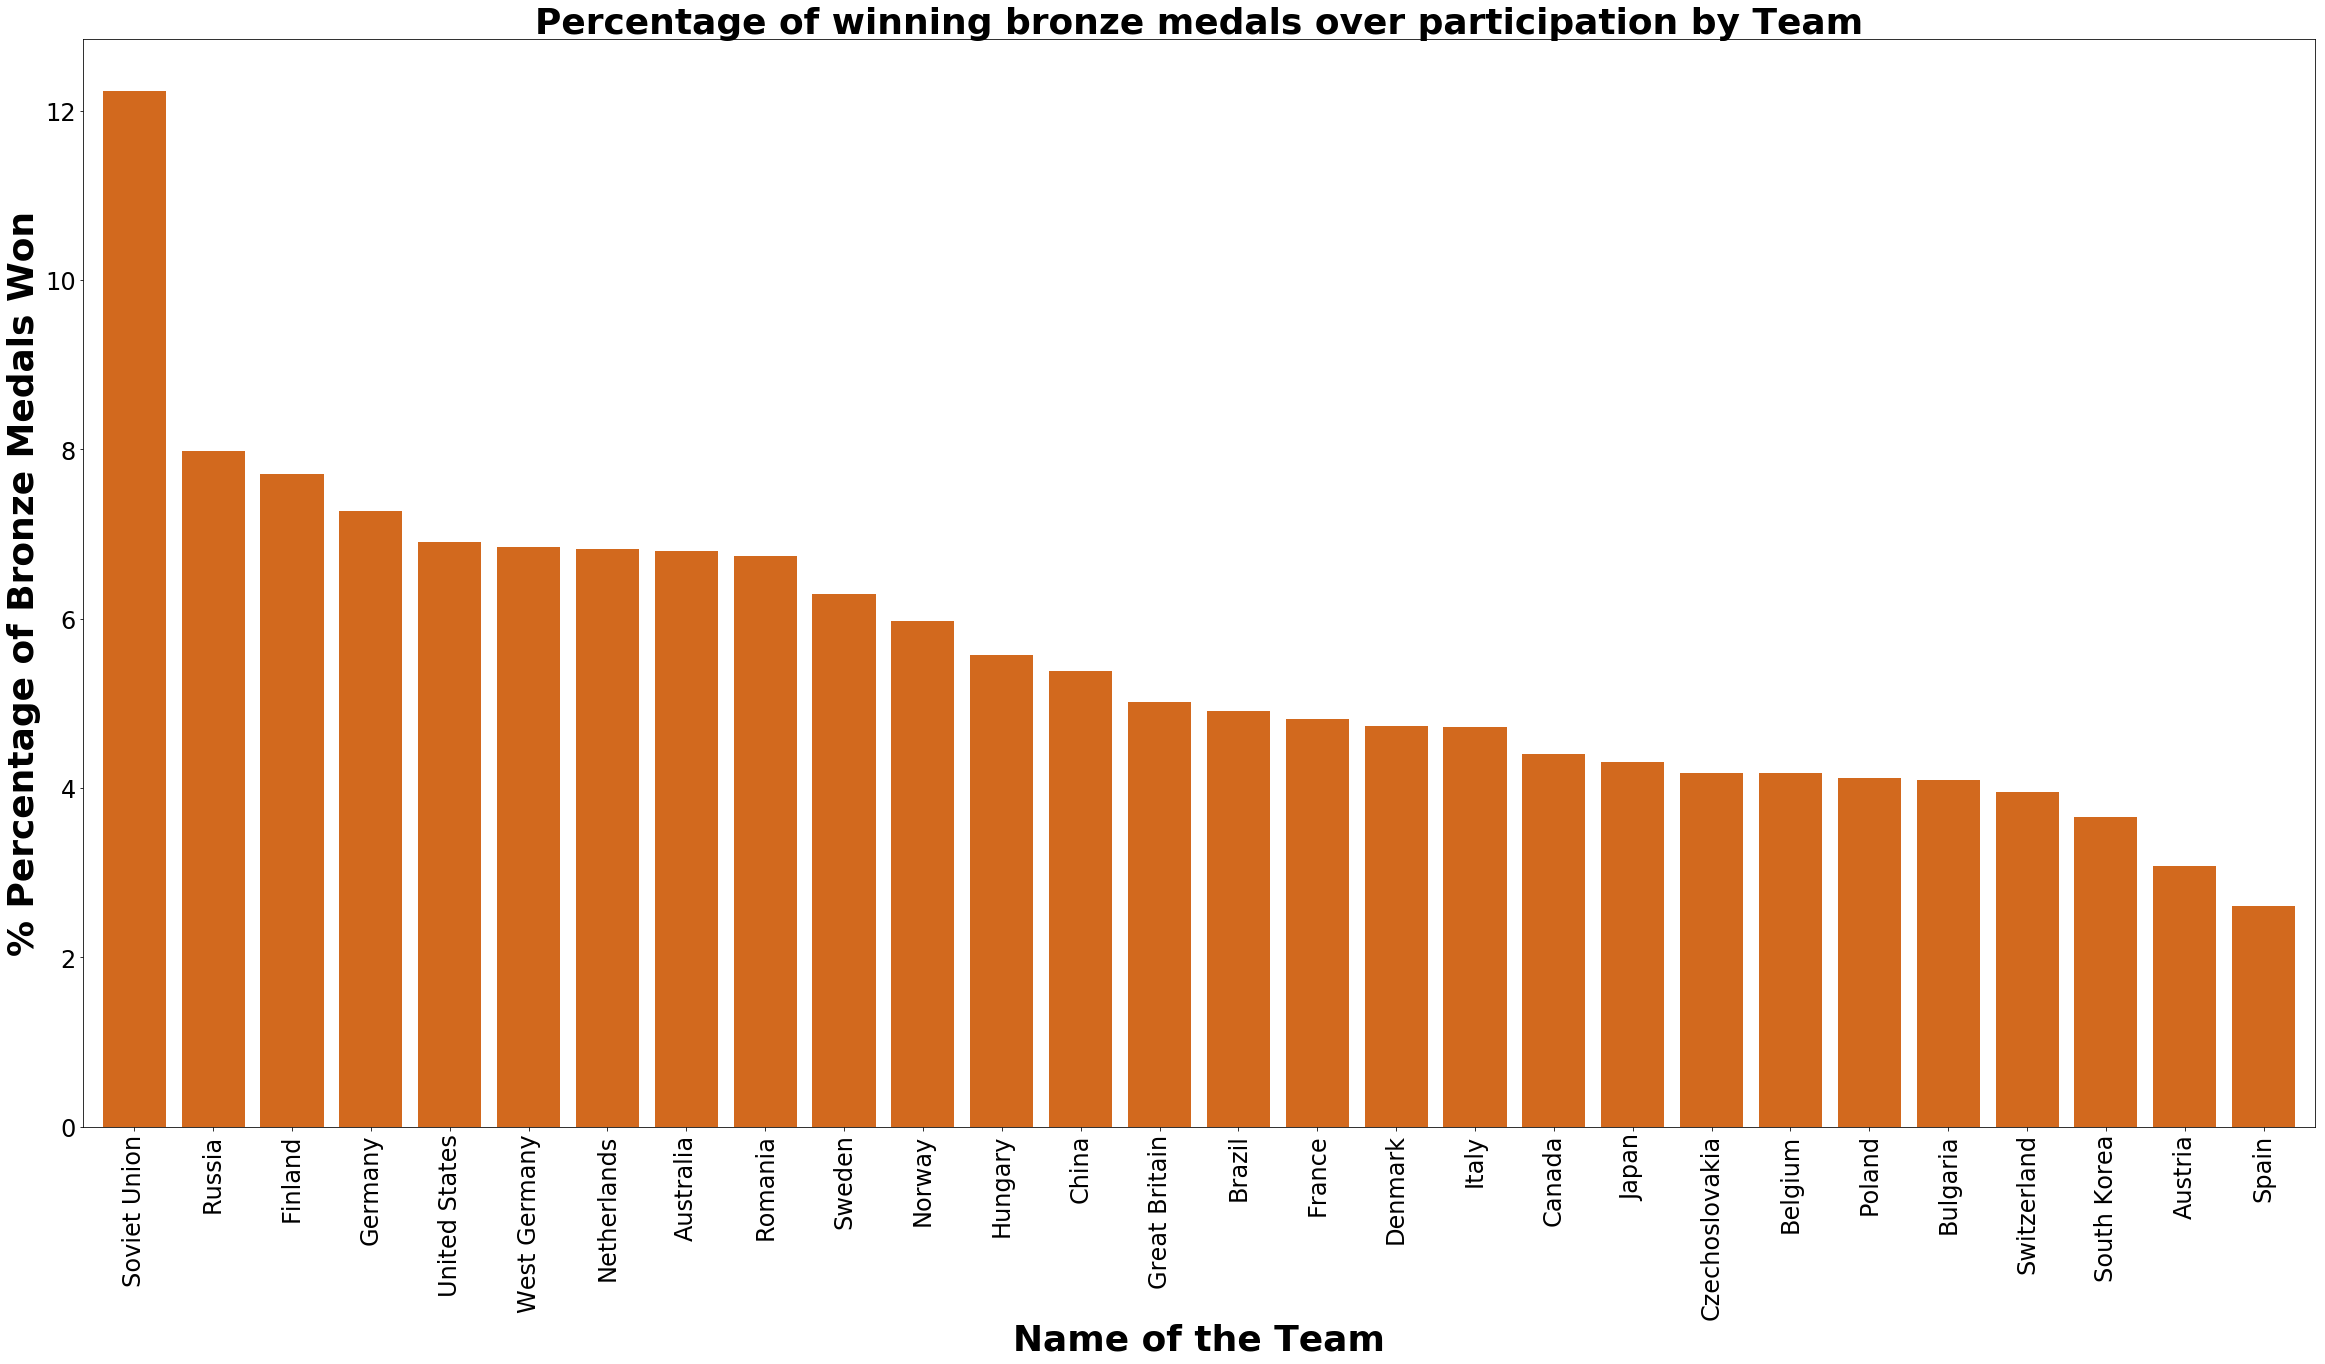

In [27]:
bronze_medal_ratio = (top_teams_bronze_medal.div(top_teams)).mul(100).sort_values(ascending=False)
bronze_medal_ratio = bronze_medal_ratio.dropna()
bronze_medal_ratio.plot(kind='Bar',width=0.8, figsize=(40, 20),fontsize=24, color='chocolate')
plt.title('Percentage of winning bronze medals over participation by Team',fontsize=36, fontweight='bold')
plt.xlabel('Name of the Team', fontsize=36, fontweight='bold')
plt.ylabel('% Percentage of Bronze Medals Won', fontsize=36, fontweight='bold')
plt.show()